# TuSimple Lane Detection Challenge - Training Dataset

## Description
The lane marking is the main component on the highway. It instructs the vehicles interactively and safely drive on the highway. Lane detection is a critical task in autonomous driving, which provides localization information to the control of the car. We provide video clips for this task, and the last frame of each clip contains labelled lanes. The video clip can help algorithms to infer better lane detection results.

## Dataset Size
3626 video clips, 3626 labelled frames. 
Information of each clip: 20 frames for each one.

## Directory Structure:
   		|
   		|----readme.md  				# description
   		|
   		|----clips/ 					# video clips, 3626 clips
   		|------|
   		|------|----some_clip/			# Sequential images for the clip, 20 frames
   		|------|----...
   		|
   		|----label_data_0313.json			# Label data for lanes
   		|----label_data_0531.json			# Label data for lanes
   		|----label_data_0601.json			# Label data for lanes

## Label Data Format
Each json line in 'label_data.json' is the label data for __the last (20th) frame__ of this clip.

__Format__

```
    {
      'raw_file': str. Clip file path.
      'lanes': list. A list of lanes. For each list of one lane, the elements are width values on image.
      'h_samples': list. A list of height values corresponding to the 'lanes', which means len(h_samples) == len(lanes[i])
    }
```
Actually there will be at most 5 lane markings in `lanes`. We expect at most 4 lane markings (current lane and left/right lanes). The extra lane is used when changing lane because it is confused to tell which lane is the current lane.

The polylines are orgnized by the same distance gap ('h_sample' in each label data) from the recording car. It means you can pair each element in one lane and h_samples to get position of lane marking on images.

Also, the lanes are around the center of sight, which we encourage the autonomous driving vehicle to focus on the current lane and left/right lanes. These lanes are essential for the control of the car.

For example,
```
{
  "lanes": [
        [-2, -2, -2, -2, 632, 625, 617, 609, 601, 594, 586, 578, 570, 563, 555, 547, 539, 532, 524, 516, 508, 501, 493, 485, 477, 469, 462, 454, 446, 438, 431, 423, 415, 407, 400, 392, 384, 376, 369, 361, 353, 345, 338, 330, 322, 314, 307, 299],
        [-2, -2, -2, -2, 719, 734, 748, 762, 777, 791, 805, 820, 834, 848, 863, 877, 891, 906, 920, 934, 949, 963, 978, 992, 1006, 1021, 1035, 1049, 1064, 1078, 1092, 1107, 1121, 1135, 1150, 1164, 1178, 1193, 1207, 1221, 1236, 1250, 1265, -2, -2, -2, -2, -2],
        [-2, -2, -2, -2, -2, 532, 503, 474, 445, 416, 387, 358, 329, 300, 271, 241, 212, 183, 154, 125, 96, 67, 38, 9, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
        [-2, -2, -2, 781, 822, 862, 903, 944, 984, 1025, 1066, 1107, 1147, 1188, 1229, 1269, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
       ],
  "h_samples": [240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710],
  "raw_file": "path_to_clip"
}
```
`-2` in `lanes` means on some h_sample, there is no existing lane marking. The first existing point in the first lane is `(632, 280)`.



## Load some test images and their ground truth

In [1]:
# import the required libraries
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import cv2
import random

%matplotlib inline

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [2]:
def parse_dataset(json_string, path_prefix = ''):
    lanes = json_string['lanes']
    num_lanes = len(lanes)
    lanes_polyline = [[] for _ in range(num_lanes)]
    h_samples = json_string['h_samples']
    for h_idx, h in enumerate(h_samples):
        for lane_idx in range(num_lanes):
            w = lanes[lane_idx][h_idx]
            if w >= 0:
                lanes_polyline[lane_idx].append((h, w))
                
    # delete an element if empty
    lanes_polyline = [ line for line in lanes_polyline if len(line) != 0]
                
    image_path = path_prefix + json_string['raw_file']
    
    return (image_path, lanes_polyline)
            

Number of images: 3626
tusimple/train_set/clips/0313-2/715/20.jpg
num of lane lines: 4
(720, 1280, 3)


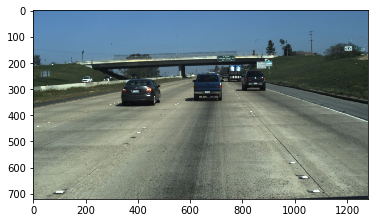

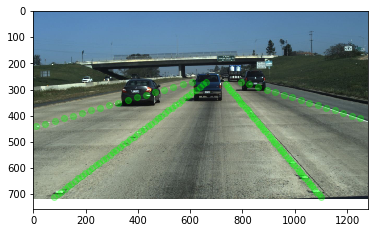

In [3]:


dataset_files = ['tusimple/train_set/label_data_0313.json', \
                 'tusimple/train_set/label_data_0531.json', \
                 'tusimple/train_set/label_data_0601.json']
json_lines = []
# read all the json strings from the file list
for filename in dataset_files:
    json_dataset_file = open(filename, 'r')
    json_lines.append(json_dataset_file.readlines())
# concat all the json lines into one list of newline-terminated strings
json_lines = [ line for file_lines in json_lines for line in file_lines ]

print('Number of images: {}'.format(len(json_lines)))

# load a random image from the dataset
json_line = random.choice(json_lines)
dataset_json = json.loads(json_line)
image_path, polylines = parse_dataset(dataset_json, 'tusimple/train_set/')
print(image_path)
print('num of lane lines: {}'.format(len(polylines)))
img = mpimg.imread(image_path)
print(np.shape(img))
# display the image and detection overlay
plt.imshow(img)
plt.figure()
plt.imshow(img)
x = [w for line in polylines for(h,w) in line]
y = [h for line in polylines for(h,w) in line]
plt.scatter(x,y, c=[(0,1,0)], alpha=0.3)
plt.show()


In [4]:
# find out counts of the number of lane lines in an image
count_num_lanes = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}
for line in json_lines:
    dict_json = json.loads(line)
    _, lanelines = parse_dataset(dict_json)
    count_num_lanes[len(lanelines)] += 1
    
count_num_lanes

{0: 0, 1: 0, 2: 5, 3: 933, 4: 2449, 5: 239}

In [5]:
# Fit a polynomial through the lane lines and find out the vertical bounds
# the result would be a vector of length 6 for each lane line
# print((len(polylines[2]) == 0))
coeffs_and_bounds = np.zeros((7, 5), dtype=np.double)
print(np.shape(coeffs_and_bounds))
H = np.shape(img)[0]
W = np.shape(img)[1]
for i, line in enumerate(polylines):
    coeffs_and_bounds[0, i] = 1.0
    x = [w/W for (h,w) in line] 
    y = [h/H for (h,w) in line] 
    coeff = np.polyfit(y,x,3)
    c = np.append(coeff, [min(y), max(y)])
    print(c)
    coeffs_and_bounds[1:,i] = c.T #np.reshape(c, (6,1))

np.shape(coeffs_and_bounds)

(7, 5)
[-0.00179274  0.00304235 -0.74582376  0.79664643  0.375       0.98611111]
[-0.00834967  0.01719016  0.46493216  0.39194049  0.38888889  0.98611111]
[-0.41795666  0.62867647 -2.27534023  1.26044193  0.375       0.61111111]
[ 0.04886878 -0.06890352  1.86441214 -0.07186564  0.375       0.56944444]


(7, 5)

In [6]:
# test_unity = np.ones((6, 4))
# a = np.array([[1,2,3,4,5,6,7]]).T
# coeffs_and_bounds[:,:] *= a
# coeffs_and_bounds

### Preparing the dataset
The following things are to be done:
 - Write a ``TUSimpleLaneDataset`` class as an extension of ``torch.Dataset`` and implement its member functions
 - Define transformation operations (like ``ToTensor()``, ``Rescale()`` etc)
 - Instantiate torch.Dataloader objects from the ``TUSimpleLaneDataset`` class to supply the data for training and evaluation

In [7]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from load_data import TUSimpleLaneDataset
from load_data import Normalize, Rescale, ReorderLanes, ToTensor, NormalizeImageNet

In [8]:
# define the transformation steps applied when loading each example
data_transforms = transforms.Compose([ \
                                      Rescale((224, 224)), \
                                      ReorderLanes(), \
                                      Normalize(), \
                                      ToTensor(), \
                                      NormalizeImageNet()])

In [9]:
# create a dataset object, which would be the used by the test and train dataloaders.
training_dataset = TUSimpleLaneDataset(json_lines, 'tusimple/train_set/', data_transforms)

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = training_dataset[i]
    print(sample['image'].size(), sample['detections'].size())

torch.Size([3, 224, 224]) torch.Size([1, 35])
torch.Size([3, 224, 224]) torch.Size([1, 35])
torch.Size([3, 224, 224]) torch.Size([1, 35])
torch.Size([3, 224, 224]) torch.Size([1, 35])


In [10]:
# create a test data loader
train_batch_len = 4
train_loader = DataLoader(training_dataset, batch_size=train_batch_len, shuffle=True, num_workers=0)

In [11]:
def visualize_detections(image_tensor, detection_tensor, existence_threshold = 0.6):
    batch_size = image_tensor.size()[0]
    print('batch_size: {}'.format(batch_size))
    denormalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])
    
    for i in range(batch_size):
        #print('----------------------------------------')
        
        image = denormalize(image_tensor[i]).data.numpy()
        dtectns = detection_tensor[i].data.numpy().reshape((7,5))
        
        # plot the image
        image = np.transpose(image, (1, 2, 0))
        #print('image shape: {}'.format(np.shape(image)))
        fig=plt.figure(figsize=(20, 20), dpi= 100, facecolor='w', edgecolor='k')
        plt.subplot(2, batch_size, i + 1)
        plt.imshow(image)
        
        #plot the detections
        max_num_dtectn = 5
        colors = ['r', 'g', 'b', 'y', 'w']
        for i in range(5):
            line_detection = dtectns[:,i]
            detection_probablity = line_detection[0]
            #print('dtection : {}'.format(line_detection))
            if detection_probablity > existence_threshold:
                coeffs, y_bounds = line_detection[1:5], line_detection[5:7]
                image_h, image_w = np.shape(image)[0], np.shape(image)[1]
                #print('image shape: {}, {}'.format(image_h, image_w))
                y_samples = np.linspace(y_bounds[0], y_bounds[1], 50)
                lane_points_x, lane_points_y = [], []
                for y in y_samples:
                    a, b, c, d = coeffs[0], coeffs[1], coeffs[2], coeffs[3]
                    x = (a * y**3) + (b * y**2) + (c * y) + d
                    lane_points_x.append(x * image_w)
                    lane_points_y.append(y * image_h)
                #print('coeff: {}, bounds: {}'.format(coeffs, y_bounds))
                plt.scatter(lane_points_x, lane_points_y, color=colors[i], alpha=0.3)
            
    plt.show()
    

img shape: torch.Size([4, 3, 224, 224]), dtectn shape: torch.Size([4, 1, 35])
batch_size: 4


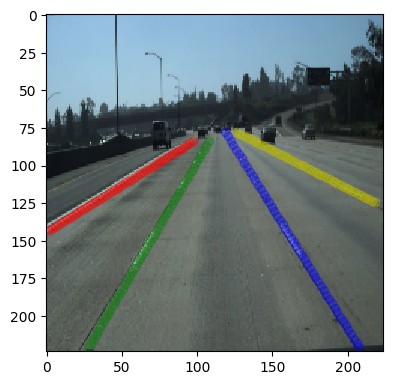

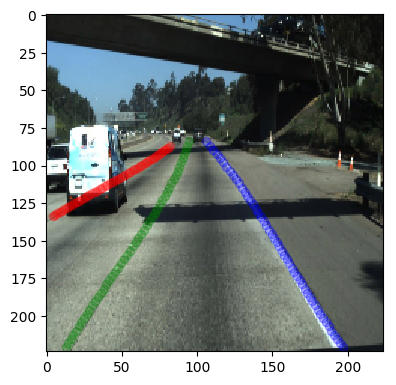

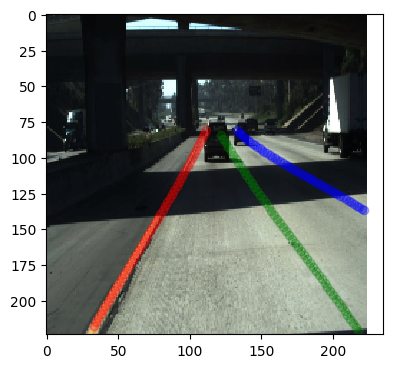

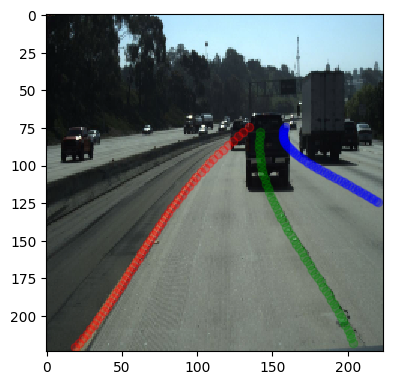

In [12]:
samples = []
for i, sample in enumerate(train_loader):
    samples.append(sample)
    if i == 0:
        break
for sample in samples:
    img = sample['image']
    dtections = sample['detections']
    print('img shape: {}, dtectn shape: {}'.format(img.size(), dtections.size()))
    visualize_detections(img, dtections)


In [13]:
a=[9,2,3,4,8]
a.sort()
a

[2, 3, 4, 8, 9]

In [14]:
import sys
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import torchvision
model = torchvision.models.mobilenet_v2(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/user/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:34<00:00, 412kB/s] 


In [15]:
for mod in list(model.features.children()):
    print('--', mod)

-- ConvBNReLU(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU6(inplace=True)
)
-- InvertedResidual(
  (conv): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
-- InvertedResidual(
  (conv): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): ConvBNReLU(
      (0): Conv2d(96, 96, kernel_size=(3,

In [16]:
model.last_channel

1280

In [17]:
import torch
a=torch.randn((2,3,4))
a

tensor([[[-0.9443, -0.5077, -1.3748,  0.5213],
         [ 1.9085,  0.4253, -1.4718,  0.7940],
         [-0.5315,  0.4435,  0.6181, -1.7158]],

        [[-0.1648,  0.0203,  0.9099,  0.6738],
         [-0.0995,  1.0345, -0.3273,  0.3179],
         [ 0.9234,  2.9500, -1.0981, -0.5488]]])

In [18]:
a=a.view(a.shape[0], -1)
a

tensor([[-0.9443, -0.5077, -1.3748,  0.5213,  1.9085,  0.4253, -1.4718,  0.7940,
         -0.5315,  0.4435,  0.6181, -1.7158],
        [-0.1648,  0.0203,  0.9099,  0.6738, -0.0995,  1.0345, -0.3273,  0.3179,
          0.9234,  2.9500, -1.0981, -0.5488]])

In [19]:

from models import PolyNet